## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Michael Noel
Full Time
Abhineet Kulkarni
mikedabossss.github.io


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols
data = pd.read_csv("kc_house_data.csv")
cols = data.columns
print(cols)
del data['sqft_basement']
del data['date']
del data['long']
del data['lat']
del data['id']
del data['view']
#deleting variables that do not do anything for my model or things that I don't know what they are

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [2]:
# LOOKING FOR MISSING DATA MAKING DECISIONS LOOKING FOR CATEGORICAL VARIABLES

#data.info()
print(data['waterfront'].isna().value_counts())
#leave the missing data because its mostly there and is true false
print(data['yr_renovated'].isna().value_counts())
#leave the data as it has a lot of it and i wouldn't want to guess the year renovated or not
#i could assume that the houses are not renovated if there is no data as that is mostly true
for i in data.columns:
    print(data[i].isna().value_counts())

False    19221
True      2376
Name: waterfront, dtype: int64
False    17755
True      3842
Name: yr_renovated, dtype: int64
False    21597
Name: price, dtype: int64
False    21597
Name: bedrooms, dtype: int64
False    21597
Name: bathrooms, dtype: int64
False    21597
Name: sqft_living, dtype: int64
False    21597
Name: sqft_lot, dtype: int64
False    21597
Name: floors, dtype: int64
False    19221
True      2376
Name: waterfront, dtype: int64
False    21597
Name: condition, dtype: int64
False    21597
Name: grade, dtype: int64
False    21597
Name: sqft_above, dtype: int64
False    21597
Name: yr_built, dtype: int64
False    17755
True      3842
Name: yr_renovated, dtype: int64
False    21597
Name: zipcode, dtype: int64
False    21597
Name: sqft_living15, dtype: int64
False    21597
Name: sqft_lot15, dtype: int64


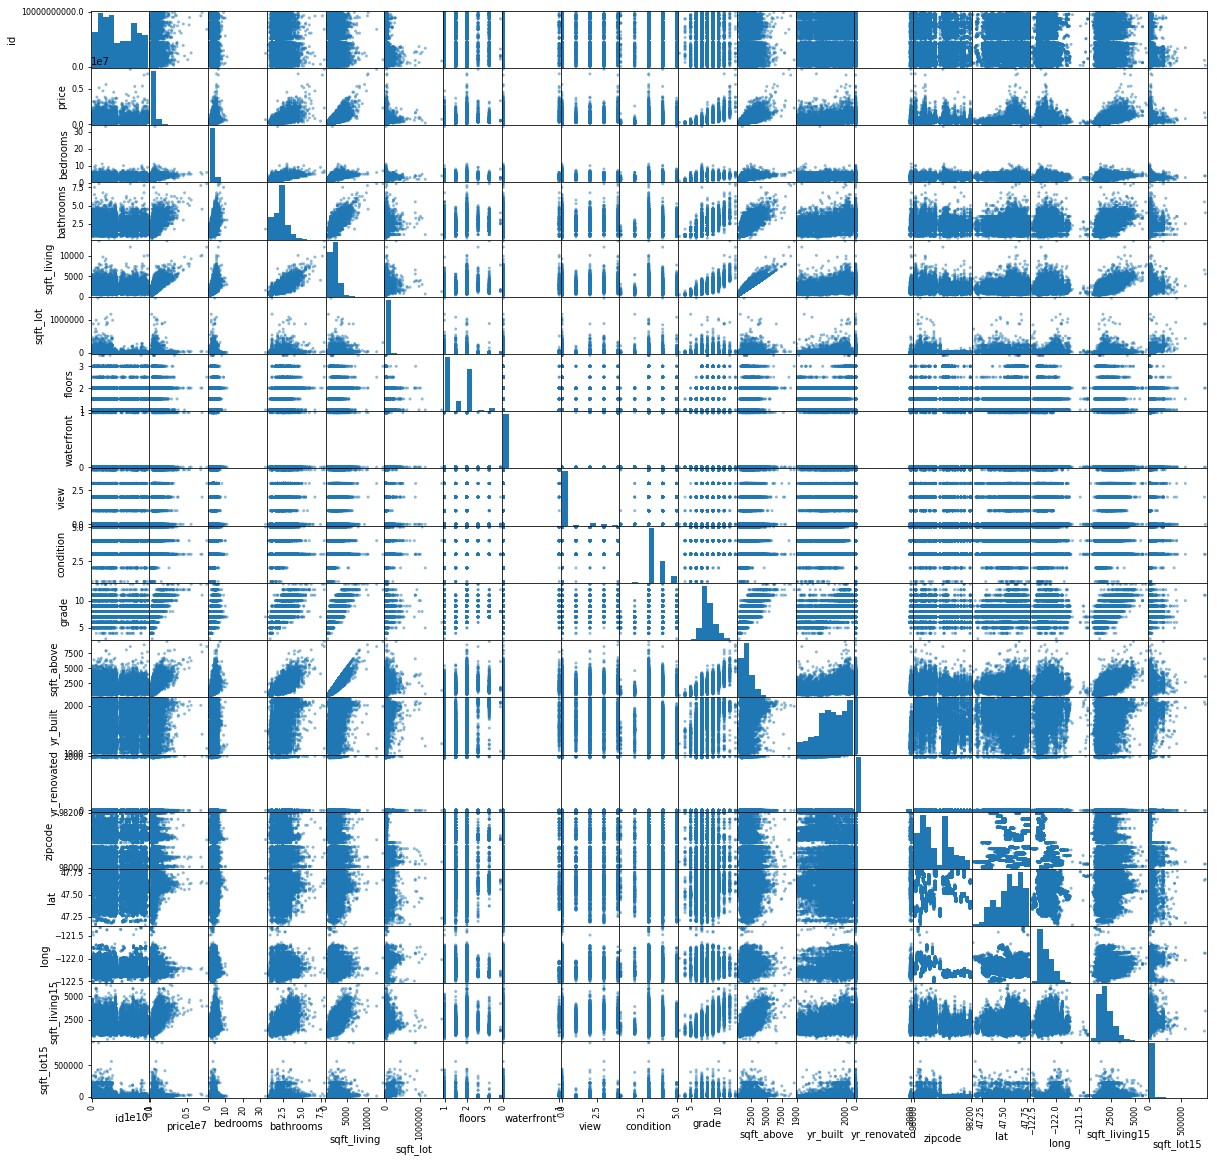

In [63]:
#BIG SCATTER PLOT OF ALL COLUMNS VS ALL COLUMNS
#JUST TO CHECK FOR ANY TYPES OF GOOD LIENAR FITS
pd.plotting.scatter_matrix(data[cols],figsize=(20,20));

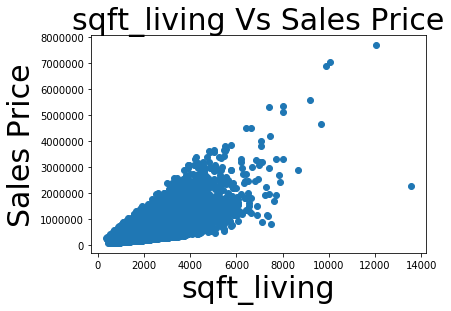

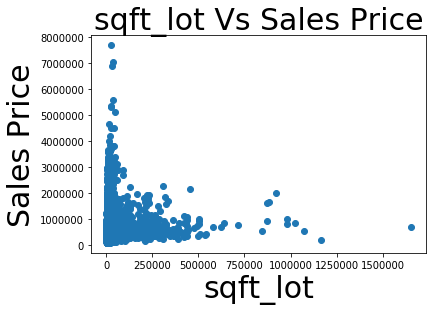

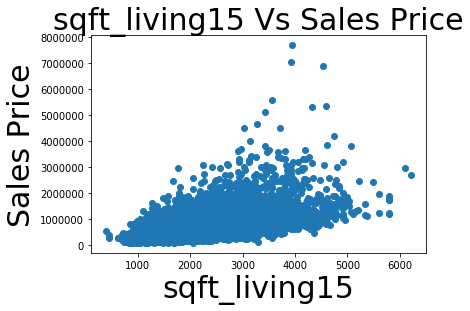

In [3]:
#CHECKING CONTINUOUS DATA FOR LINEARITY AND homoscedasticity
datacols = data.columns
contindata = ['sqft_living','sqft_lot','sqft_living15']
for col in contindata:
    plt.scatter(data[col],data['price'],label=col)
    plt.ylabel('Sales Price',size=30)
    plt.xlabel(col,size=30)
    plt.title('{} Vs Sales Price'.format(col),size=30)
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

There is not a very good linear relationship between any of the continous variables 

In [2]:
#FINDING ALL THE OUTLIERS BY REMOVING ALL DATA POINTS WITH 3 Z SCORE OR HIGHER
from scipy import stats
import numpy as np
#do this for each column continuous variables
continuous = ['price','sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15']
for i in continuous:
    z = np.abs(stats.zscore(data[i]))
    data['z'] = z
    data = data[data['z'] < 3 ]
print(data.info())
graphingdata = data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20087 entries, 0 to 21596
Data columns (total 16 columns):
price            20087 non-null float64
bedrooms         20087 non-null int64
bathrooms        20087 non-null float64
sqft_living      20087 non-null int64
sqft_lot         20087 non-null int64
floors           20087 non-null float64
waterfront       17867 non-null float64
condition        20087 non-null int64
grade            20087 non-null int64
sqft_above       20087 non-null int64
yr_built         20087 non-null int64
yr_renovated     16490 non-null float64
zipcode          20087 non-null int64
sqft_living15    20087 non-null int64
sqft_lot15       20087 non-null int64
z                20087 non-null float64
dtypes: float64(6), int64(10)
memory usage: 2.6 MB
None


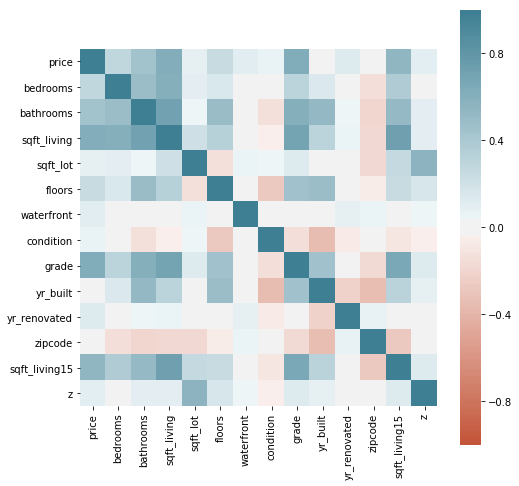

In [3]:
#FIND THE MULTI COLLINEARITY 
abs(data.corr()) > 0.75
#the lot sizes are highly corr with 15 neighbors lot sizes
#sqft above basement AND SQFT LIVING CORRELATED
del data['sqft_above']
del data['sqft_lot15']
corr = data.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

There is nothing that is too strongly correlated with price either positively or negatively as I've removed the most collinear relationships already 

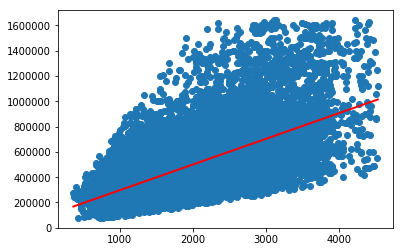

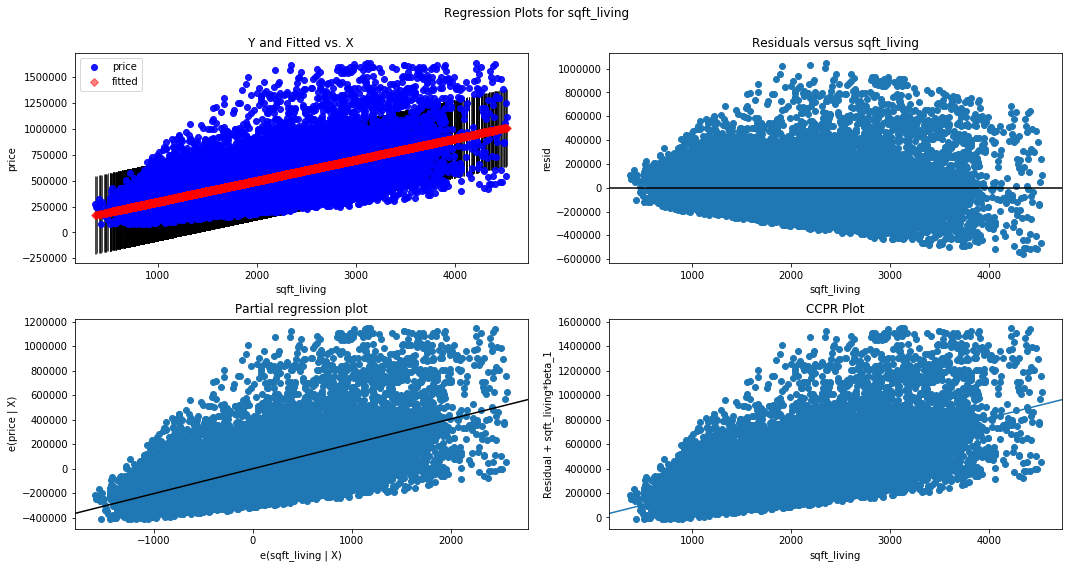

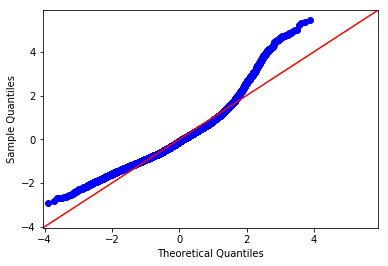

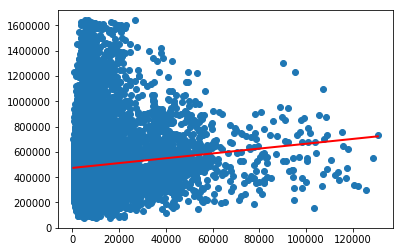

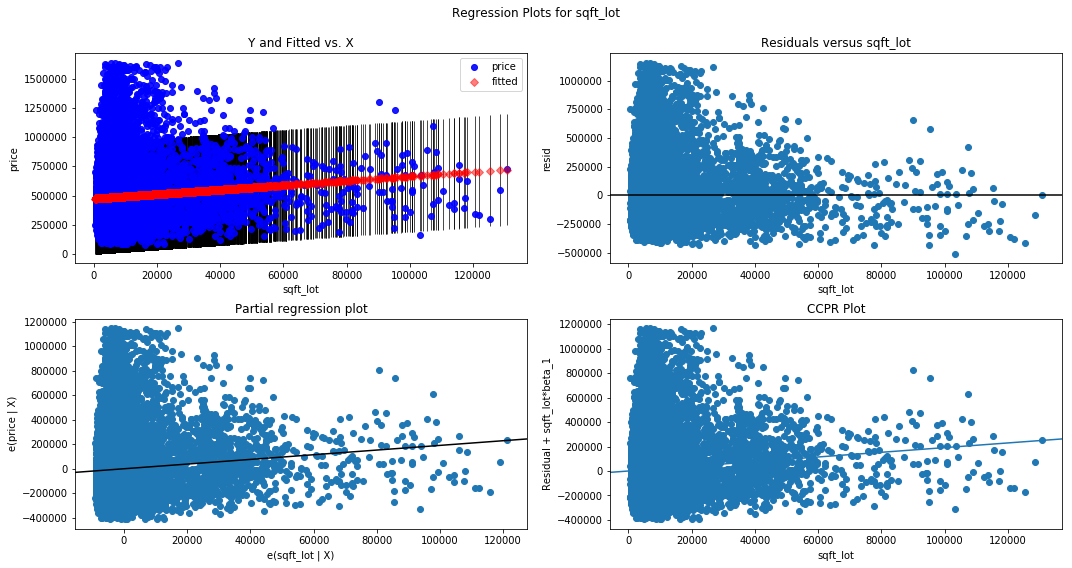

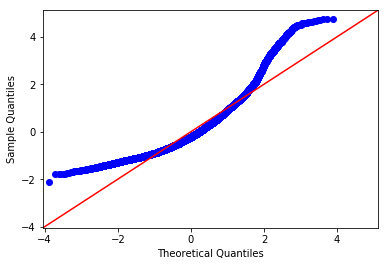

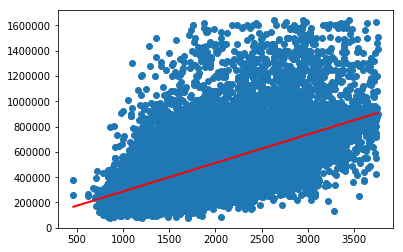

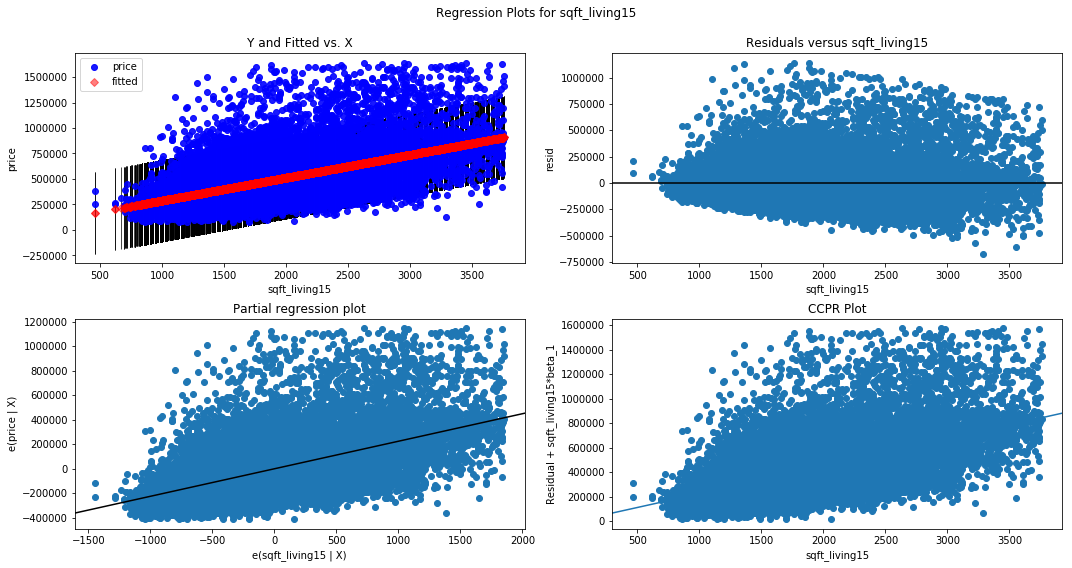

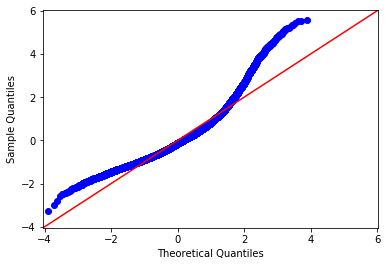

In [48]:
#PRINT OUT PLOTS OF EACH CONTINUOUS VARIABLE AGAINST PRICE
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['sqft_living','sqft_lot','sqft_living15']):
    f = 'price~' + val
    model = smf.ols(formula=f,data=data).fit()
    X_new = pd.DataFrame({val: [data[val].min(), data[val].max()]})
    preds = model.predict(X_new)
    plt.scatter(data[val],data['price'])
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
        

There is not a very good fit looking at all the different correlation plots still shows a bad fit

In [135]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,sqft_living,0.380238,93004.9,203.244,0,8180.3
2,sqft_lot,0.0064715,472964,1.91004,3.35125e-30,12160.3
3,sqft_living15,0.293236,62625.3,224.872,0,13134.2


There is almost no r squared correlation between any of the continuous variables relative to price

In [4]:
#LOGGING THE CONTINUOUS VARIABLES SINCE NOT NORMAL DISTRIBUTION 
#MAKING THE DATA MORE USEABLE 
logsqft_living = np.log(data['sqft_living'])
logsqft_lot = np.log(data['sqft_lot'])
logsqft_living15 = np.log(data['sqft_living15'])
loggered = pd.concat([logsqft_living,logsqft_lot,logsqft_living15],axis=1)
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
for idx, val in enumerate(['sqft_living','sqft_lot','sqft_living15']):
    f = 'price~' + val
    model = smf.ols(formula=f,data=data).fit()
    X_new = pd.DataFrame({val: [loggered[val].min(), loggered[val].max()]})
    preds = model.predict(X_new)
    plt.scatter(loggered[val],data['price'])
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
        

NameError: name 'smf' is not defined

In [5]:
#SCALING THE CONTINUOUS VARIABLES 
#MAKING THE DATA BETTER FOR MODELING
scaled_sqft_living = (logsqft_living-np.mean(logsqft_living))/np.sqrt(np.var(logsqft_living))
scaled_sqft_living15 =(logsqft_living15-np.mean(logsqft_living15))/np.sqrt(np.var(logsqft_living15))
scaled_sqft_lot = (logsqft_lot-np.mean(logsqft_lot))/np.sqrt(np.var(logsqft_lot))
data['sqft_living'] = scaled_sqft_living
data['sqft_living15'] = scaled_sqft_living15
data['sqft_lot'] = scaled_sqft_lot

In [77]:
pd.DataFrame(results)
#doing a log transformation made the R sqared value go down on sqft living


,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,sqft_living,0.380238,93004.9,203.244,0,8180.3
2,sqft_lot,0.0064715,472964,1.91004,3.35125e-30,12160.3
3,sqft_living15,0.293236,62625.3,224.872,0,13134.2


In [4]:
#TURNING THE CATEGORICAL VARIABLES INTO 0'S AND 1'S AND MULTIPLE FEATURES


categorical = ['bedrooms','bathrooms','waterfront','condition','grade','zipcode','floors','yr_built','yr_renovated']
bedrooms_dummies = pd.get_dummies(data['bedrooms'], prefix='bed')
bathrooms_dummies = pd.get_dummies(data['bathrooms'], prefix='bath')
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='watr')
condition_dummies = pd.get_dummies(data['condition'], prefix='condition')
grade_dummies = pd.get_dummies(data['grade'], prefix='grade')
zipcode_dummies = pd.get_dummies(data['zipcode'], prefix='zip')
yr_renovated_dummies = pd.get_dummies(data['yr_renovated'], prefix='yr_reno')
yr_built_dummies = pd.get_dummies(data['yr_built'],prefix='yr_built')
floors_dummies = pd.get_dummies(data['floors'],prefix='floorlevel')
data = data.drop(categorical,axis = 1 )
joined = [data,bedrooms_dummies,bathrooms_dummies,waterfront_dummies,condition_dummies,grade_dummies,zipcode_dummies,floors_dummies,yr_renovated_dummies]
data = pd.concat(joined, axis=1)
del data['bed_33']# an outlier. who has 33 beds? 


In [10]:
#changing periods to underscores for categories to work in pandas
newcols = []
for i in data.columns:
    t = i.split('.')
    j = '_'.join(t)
    newcols.append(j)
data.columns = newcols
nowater = data.query('watr_0_0 == 1')['price'].mean()
print(nowater)
water = data.query('watr_1_0 == 1')['price'].mean()
print(water)


490218.6633518737
928284.5588235294


In [7]:
#MAKING A MODEL WITH ALL OF THE FEATURES PRE PROCESSED
outcome = 'price'
predictors = data
predictors = predictors.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     482.5
Date:                Sun, 11 Aug 2019   Prob (F-statistic):               0.00
Time:                        22:06:30   Log-Likelihood:            -2.6014e+05
No. Observations:               20087   AIC:                         5.207e+05
Df Residuals:                   19892   BIC:                         5.222e+05
Df Model:                         194                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.99e+05   6.83e+04      2.913      0.004    6.51e+04    3.33e+05
sqft_living      109.8805      2.094     52.472      0.000     105.776     113.985
sqft_lot           1.3847      0.107     12.904      0.000       1.174       1.595
sqft_living15     42.8202      2.138     20.032      0.000      38.630      47.010
z              -2.425e+04   2831.814     -8.563      0.000   -2.98e+04   -1.87e+04
bed_1          -5.014e+04   1.03e+05     -0.487      0.626   -2.52e+05    1.51e+05
bed_2          -3.904e+04   1.03e+05     -0.381      0.703    -2.4e+05    1.62e+05
bed_3          -3.255e+04   1.03e+05     -0.317      0.751   -2.34e+05    1.68e+05
bed_4          -4.067e+04   1.03e+05     -0.397      0.692   -2.42e+05     1.6e+05
bed_5          -5.556e+04   1.03e+05     -0.541      0.588   -2.57e+05    1.46e+05
bed_6          -7.067e+04   1.03e+05     -0.687      0.492   -2.72e+05    1.31e+05
bed_7          -1.313e+05   1.05e+05     -1.256      0.209   -3.36e+05    7.37e+04
bed_8          -1.647e+05   1.08e+05     -1.520      0.128   -3.77e+05    4.76e+04
bed_9          -9.524e+04   1.15e+05     -0.826      0.409   -3.21e+05    1.31e+05
bed_10         -1.621e+05   1.26e+05     -1.290      0.197   -4.09e+05    8.43e+04
bed_11         -1.839e+05   1.49e+05     -1.234      0.217   -4.76e+05    1.08e+05
bath_0_5       -4.276e+04   4.97e+04     -0.860      0.390    -1.4e+05    5.47e+04
bath_0_75      -2120.1819   1.57e+04     -0.135      0.893    -3.3e+04    2.87e+04
bath_1_0        1108.0328   9120.277      0.121      0.903   -1.68e+04     1.9e+04
bath_1_25      -3904.9575   3.39e+04     -0.115      0.908   -7.03e+04    6.25e+04
bath_1_5       -5147.4365   9196.504     -0.560      0.576   -2.32e+04    1.29e+04
bath_1_75      -5686.8925   8991.737     -0.632      0.527   -2.33e+04    1.19e+04
bath_2_0       -5463.8445   9073.699     -0.602      0.547   -2.32e+04    1.23e+04
bath_2_25       5256.5091   9012.536      0.583      0.560   -1.24e+04    2.29e+04
bath_2_5        -290.3199   8853.679     -0.033      0.974   -1.76e+04    1.71e+04
bath_2_75       1.066e+04   9199.620      1.159      0.246   -7367.077    2.87e+04
bath_3_0        1.197e+04   9466.167      1.265      0.206   -6581.963    3.05e+04
bath_3_25       4.263e+04   9976.896      4.273      0.000    2.31e+04    6.22e+04
bath_3_5        3.875e+04   9734.163      3.980      0.000    1.97e+04    5.78e+04
bath_3_75       9.092e+04   1.37e+04      6.650      0.000    6.41e+04    1.18e+05
bath_4_0        3.328e+04   1.53e+04      2.176      0.030    3306.018    6.33e+04
bath_4_25        8.63e+04   2.19e+04      3.945      0.000    4.34e+04    1.29e+05
bath_4_5        4.146e+04   1.84e+04      2.254      0.024    5406.242    7.75e+04
bath_4_75      -8.793e+04   6.98e+04     -1.260      0.208   -2.25e+05    4.89e+04
bath_5_0    

In [10]:
#DELETE ALL THE COLUMNS WITH A P VALUE OF GREATER THAN 5% 
pvals = model.pvalues
cols = list(pvals.keys())
for col,pval in enumerate(pvals):
    if pval < 0.05:
        None
    else:
        del data[cols[col]]

In [15]:
#MAKING A MODEL WITH ALL OF THE FEATURES PRE PROCESSED
outcome = 'price'
predictors = data
# predictors = predictors.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=data).fit()
model.summary()

In [12]:
#DO THIS AGAIN
#DELETE ALL THE COLUMNS WITH A P VALUE OF GREATER THAN 5% 
pvals = model.pvalues
cols = list(pvals.keys())
for col,pval in enumerate(pvals):
    if pval < 0.05:
        None
    else:
        del data[cols[col]]

In [13]:
#MAKING A MODEL WITH ALL OF THE FEATURES PRE PROCESSED
outcome = 'price'
predictors = data
predictors = predictors.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     668.5
Date:                Sun, 11 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:32:59   Log-Likelihood:            -2.6242e+05
No. Observations:               20087   AIC:                         5.251e+05
Df Residuals:                   19980   BIC:                         5.259e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.929e+05    2.2e+04     17.863      0.000     3.5e+05    4.36e+05
sqft_living     8.972e+04   1212.881     73.973      0.000    8.73e+04    9.21e+04
sqft_lot        2.338e+04   1130.380     20.679      0.000    2.12e+04    2.56e+04
sqft_living15   4.442e+04   1288.027     34.486      0.000    4.19e+04    4.69e+04
z              -9300.7268   2526.860     -3.681      0.000   -1.43e+04   -4347.872
bath_3_25        9.74e+04   5804.656     16.780      0.000     8.6e+04    1.09e+05
bath_3_5        1.002e+05   5233.203     19.144      0.000    8.99e+04     1.1e+05
bath_3_75       1.517e+05   1.24e+04     12.204      0.000    1.27e+05    1.76e+05
bath_4_0        7.762e+04   1.48e+04      5.236      0.000    4.86e+04    1.07e+05
bath_4_25       1.673e+05   2.35e+04      7.107      0.000    1.21e+05    2.13e+05
bath_4_5        8.568e+04   1.85e+04      4.622      0.000    4.93e+04    1.22e+05
watr_1_0        4.274e+05   1.44e+04     29.781      0.000    3.99e+05    4.56e+05
condition_2     6.515e+04   2.36e+04      2.759      0.006    1.89e+04    1.11e+05
condition_3     9.359e+04   2.18e+04      4.295      0.000    5.09e+04    1.36e+05
condition_4     1.023e+05   2.18e+04      4.691      0.000    5.95e+04    1.45e+05
condition_5     1.409e+05   2.19e+04      6.421      0.000    9.79e+04    1.84e+05
grade_12        2.477e+05   1.15e+05      2.157      0.031    2.26e+04    4.73e+05
zip_98001      -2.101e+05   6704.669    -31.341      0.000   -2.23e+05   -1.97e+05
zip_98002      -1.808e+05   8656.977    -20.882      0.000   -1.98e+05   -1.64e+05
zip_98003      -1.988e+05   7469.828    -26.618      0.000   -2.13e+05   -1.84e+05
zip_98004        4.07e+05   8314.582     48.950      0.000    3.91e+05    4.23e+05
zip_98005       1.357e+05   9841.402     13.785      0.000    1.16e+05    1.55e+05
zip_98006       1.012e+05   6380.874     15.855      0.000    8.87e+04    1.14e+05
zip_98007       6.717e+04   1.01e+04      6.659      0.000    4.74e+04    8.69e+04
zip_98008       5.407e+04   7518.952      7.191      0.000    3.93e+04    6.88e+04
zip_98010      -1.265e+05   1.34e+04     -9.418      0.000   -1.53e+05      -1e+05
zip_98011      -7.191e+04   8800.001     -8.172      0.000   -8.92e+04   -5.47e+04
zip_98014      -8.705e+04   1.33e+04     -6.564      0.000   -1.13e+05   -6.11e+04
zip_98019      -1.302e+05   9477.059    -13.741      0.000   -1.49e+05   -1.12e+05
zip_98022      -1.923e+05   9018.726    -21.322      0.000    -2.1e+05   -1.75e+05
zip_98023      -2.219e+05   5887.374    -37.696      0.000   -2.33e+05    -2.1e+05
zip_98024       -6.93e+04   1.84e+04     -3.761      0.000   -1.05e+05   -3.32e+04
zip_98028      -7.424e+04   7373.525    -10.069      0.000   -8.87e+04   -5.98e+04
zip_98029       5.171e+04   7130.632      7.251      0.000    3.77e+04    6.57e+04
zip_98030   

My model of the home price data has removed most of the variables as being too unreliable with confidence intervals at less than 5% I had to get rid of them. My models R squared value went down when I got rid of these unreliable variables but my initial model might have been overfitted. My model explains 78% of the price for homes which is pretty good. Most of the variables have a confidence interval of more than 99.9% or very reliable.

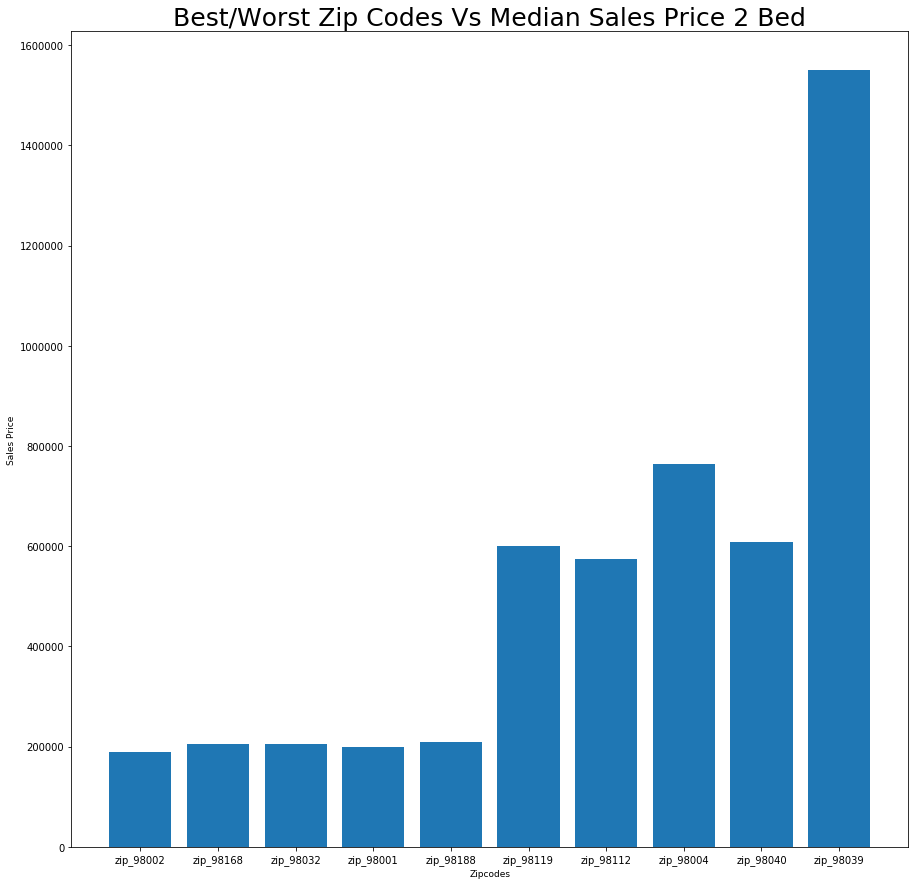

In [14]:
# the best and worst zip codes  affect on price
zipcols = {}
for i in data.columns:
    if 'zip' in i :
        zipcols[i] = {'price': 0}
for i in zipcols:
    zipcols[i]['price'] = data['price'].groupby(data[i]).median()[1]
listofTuples = sorted(zipcols.items() ,  key=lambda x: x[1]['price'])
cheap = listofTuples[:5]
expensive = listofTuples[-6:]
#find the median price of a 2 bedroom house per zipcode given
disparity = {}
for k,v in cheap:
    q = data.query('{} == 1'.format(k))
    l = q.query('bed_2 == 1 ')
    disparity[k] = l['price'].median()
for k,v in expensive:
    q = data.query('{} == 1'.format(k))
    l = q.query('bed_2 == 1 ')
    disparity[k] = l['price'].median()
disparity.pop('zip_98005',None)
plt.figure(figsize=(15,15))
plt.bar(disparity.keys(),disparity.values())
plt.ylabel('Sales Price',size=9)
plt.xlabel('Zipcodes',size=9)
plt.title('Best/Worst Zip Codes Vs Median Sales Price 2 Bed',size=25)
plt.savefig('zipcodes.png')
plt.show()

This visualization shows the relationship between how each zipcode can have a big impact on the sales price even though something that strongly affects the value of a home ( the amount of bedrooms) is the same. In the most expensive median sales price zip code overall the 2 bedrooms were nearly 8 times more than the cheapest zip codes 2 bedroom houses. Although the quality of the houses could be different in each of the zipcodes overall they probably are not that different and the condition variable does not affect sales price that much. This means that these zipcodes explain a lot . I believe the zipcode data accounts for some of the accounting real estate agents use to sell houses such as crime free areas, nice parks, access to businesses, nicer schools, and less industrial.

28
275000.0


153
269950.0


12942
437000.0


5364
432000.0


1600
515000.0




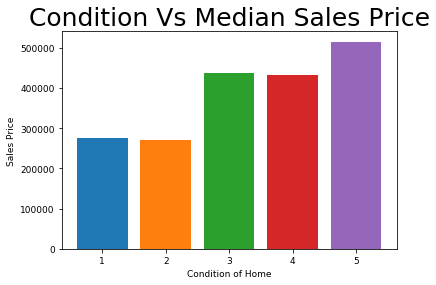

In [62]:
for i in range(1,6):
    print(data['condition_{}'.format(i)].value_counts()[1])
    print(data['price'].groupby(data['condition_{}'.format(i)]).median()[1])
    print('\n')
    plt.bar(i,data['price'].groupby(data['condition_{}'.format(i)]).median()[1])
plt.ylabel('Sales Price',size=9)
plt.xlabel('Condition of Home',size=9)
plt.title('Condition Vs Median Sales Price',size=25)
plt.xticks(size=9)
plt.yticks(size=9)
plt.savefig('condition.png')
plt.show()

This shows that the condition of the property has a strong correlation to sales price. The better the condition the better the sales price generally. It looks like the lower 2 conditions are similiar and that condition 3 and 4 are also similiar. This must mean that condition is important but that there are other factors involved in the sales price. The highest rated condition is worth a lot more than the bottom condition homes. This means that condition is not something that is worth spending lots of money on unless you can be sure that you would move the condition ranking up multiple steps on the ranking system. Spending lots just to move up 1 rank only would be worth it from 2 to 3 or 4 to 5. I suspect that to get from 2 to 3 costs a lot and that to get from 4 to 5 also costs a lot more than it costs to go from 1 to 2 or from 3 to 4. 

In [58]:
# for i in range(0,5):
#     print(data['view_{}_0'.format(i)].value_counts()[1])
#     print(data['price'].groupby(data['view_{}_0'.format(i)]).median()[1])
#     print('\n')
#     plt.bar('view_{}_0'.format(i),data['price'].groupby(data['view_{}_0'.format(i)]).median()[1])
# plt.show()

In [57]:
#K FOLDS CROSS VALIDATION TEST MSE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
import math 
linreg = LinearRegression()
num = 10
train_err = []
test_err = []
X = data
X = data.dropna(how='any')

del X['price']
y = data
y = data.dropna(how='any')
y = y['price']
data = data
   
for i in range(num):  
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    outcome = 'price'
    pred_sum = "+".join(predictors.columns)
    formula = outcome + "~" + pred_sum
    model = ols(formula= formula, data=data).fit()
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
print(np.mean(train_err),np.mean(test_err))


10577154140.840994 10665443726.354841


The above Mean Square Error from the test and the train shows that the model is not overfitting because the training error is only a little less than the testing error. If you square root these numbers the mean error is roughly $100,000 per house. Meaning that my model is not as accurate as a home buyer might want when shopping around. Say an average house in King County is worth $450,000 . My model would only tell them that the house could be worth either $350,000 if guessing too low or $550,000 on average if guessting too high. A $200,000 swing in home value accounts for nearly half the sales price. Or that is such a large difference that my model is only good at looking at general things or a very rough estimate. 

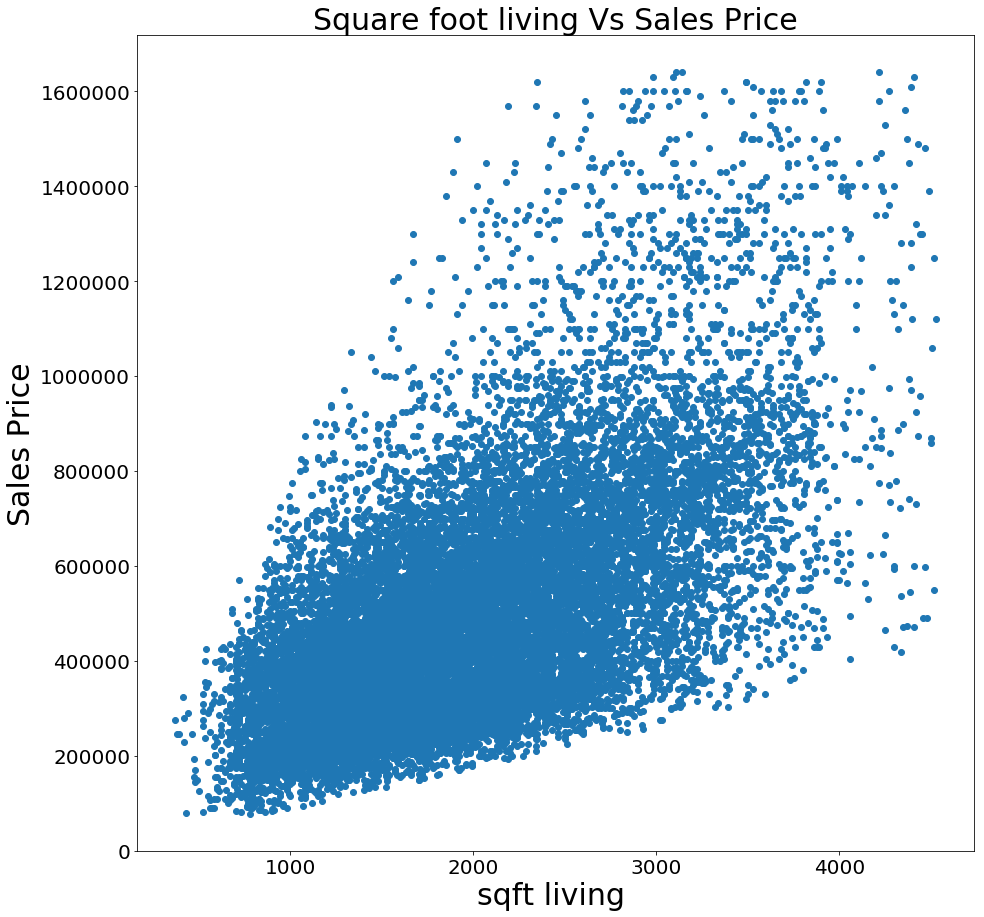

In [14]:
plt.figure(figsize=(15,15))
plt.scatter(graphingdata['sqft_living'],graphingdata['price'])
plt.ylabel('Sales Price',size=30)
plt.xlabel('sqft living ',size=30)
plt.title('Square foot living Vs Sales Price',size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('sqft_living.png')
plt.show()

There is a linear relationship between the square foot of the living space and the sales price. Most people buy houses because they want to live in it not just because they would want to just buy a property to let it appreciate over time. Even though there seems to be lots of houses that have the same square footage of living space but sell for large differences in price just means that there are other variables that also account for a lot of the sales price. It is still obvious that the more square footage of living space the more people pay for the house in general and that would make sense because space is something that is okay to have more than enough of but is not good at all if you do not have enough. 

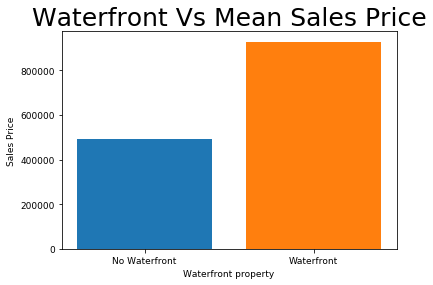

In [12]:

plt.bar("No Waterfront",nowater)
plt.bar("Waterfront",water)
plt.ylabel('Sales Price',size=9)
plt.xlabel('Waterfront property',size=9)
plt.title('Waterfront Vs Mean Sales Price',size=25)
plt.xticks(size=9)
plt.yticks(size=9)
plt.savefig('waterfront.png')
plt.show()

The water front graph above shows that the difference between water front and non water front properties on average is nearly $400,000 per house. That is the average of all the houses of King County of difference just for being on the water. In King County there is a large premium for being near the water as people must really like the view. There could be other parts of this variable that are not in the data such as houses near the water are probably larger and worth more anyways since rich people who can afford the nice views of the water also can afford to have a nicer house in general. I still would say that this does not account for such a large difference and that clearly a water front view is worth quite a bit. 

Who are the people who are buying most homes?
How much do most people care about particulars in their house? 
Does the location matter more than the actual house itself? 

The location matters much more than the actual house because home condition did not affect the sales prices nearly as much as the zip code had affected the sales price. 

Home buyers do not care so much about any particular thing in general. Most people look for what exactly fits their own styles and preferences which look different for each person. Although general trends are obvious the zipcode difference and waterfront differences that remain in my model after removing lots of non confident variables means that lots of the explainable difference is not anything particular about the house that might not be seen in the data because it is too small to capture, paint color , but mostly big things that can not be changed such as location and the view of the water.

Most people who are buying the homes buy the house to fit what they need. With the condition visualization it can be seen that condition is not worth everything because the better quality houses do not always mean lots more money in terms of sales price. The people who are buying houses care more about things that probably are not captured in this data such as schools, local businesses, and crime rates. That may be why zipcodes are worth so much money is because indirectly zipcodes could account for these types of things without directly accounting for them. Overall I believe that home buyers have to settle on certain things to get other things that they want.

The approach that I took to this project was to use the knowledge of the things that I looked for in houses and try to find trends and patterns that fit the things that I thought were true. I mainly thought that there would be a singular feature that would account for most of the sales price but that was not quite true. It turned out that why people pay more or less money for a house in King County is complicated. Anyways I decided to not mess around with trying to add new features to the dataset because I felt that the data provided would be good enough with the knowledge that I have about the housing market. Although some new features added on to see if they have a strong correlation not already in the dataset would and could help I don't have the business knowledge of King County to have a good shot at finding new correlations that are not included. If I was to try to add any new features I would have added a similiar house sales price to find the most similiar houses in the area and see if somehow a certain trend in one area emerged for example 2 bedrooms are really hot in this one section of King County but only a few miles away 2 bedrooms really are the worst performers. Something like that brings the size of the housing correlation from a zipcode to a neighborhood type of size. 

Square foot living has a moderate impact on the sales price. With all of the coefficients either being positive or negative this one in my model is positive. Meaning that the more square foot plugged in to my model the more the sales price should be. My model is shifting to a zero mean meaning that I scaled my data on the continuous variables (variables that are not categories) so that the mean is 0 instead of whatever it was before. It is hard to say exactly how much each square foot extra will add to the price without more analysis, but it is clear that more square footage is going to make a house worth more overall.

watr_1_0 has a relatively big difference compared to the opposite which is watr_0_0. This means that they are on the water vs not on the water. Not on the water in my model is not reliable enough to be in the model. The watr1_0 feature accounts for a lot if you look at the visualization the average difference in price is nearly double the price of a non-water house. My Model says that just having a view of the water is worth more than not having a few and it's very confident. 



Baths as a variable are only important enough if it is between 3.25 and 4.25 bathrooms in King County. For some reason my model has estimated with over 99% confidence that if a house has anywhere between these bathroom amounts in a house that the sales price will be affected and the sales price should go up according to my model. There must be a premium on this amount of bathrooms but elsewhere the premium either doesn't exist for bathrooms or my model couldn't accurately measure the premium enought to be used.